<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

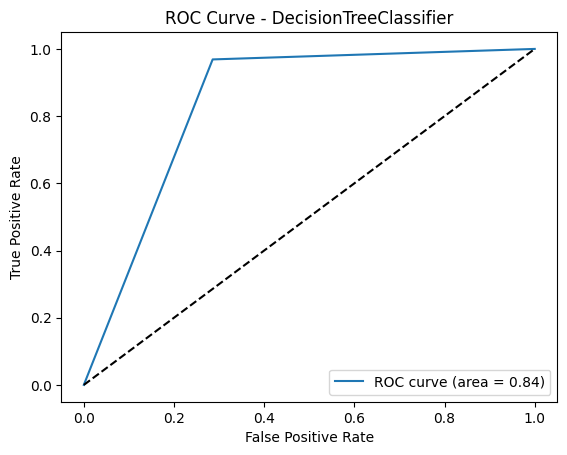

Model: KNeighborsClassifier
Train Accuracy: 0.9487179487179487
Test Accuracy: 0.9487179487179487
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Confusion Matrix:
 [[ 5  2]
 [ 0 32]]


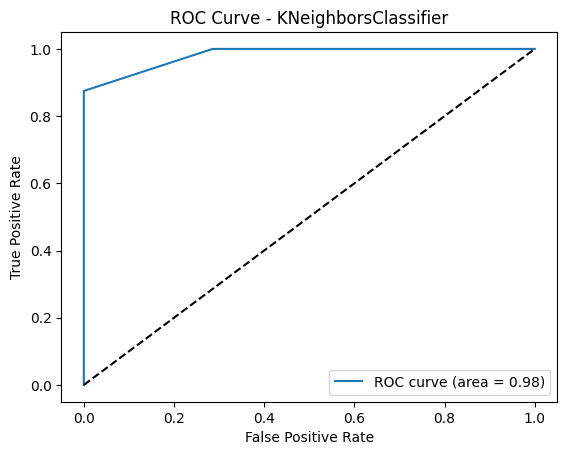

Model: SVC
Train Accuracy: 0.9038461538461539
Test Accuracy: 0.8717948717948718
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39

Confusion Matrix:
 [[ 4  3]
 [ 2 30]]


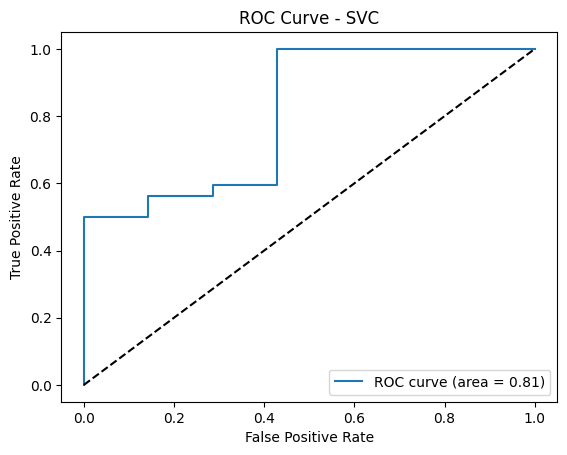

Model: RandomForestClassifier
Train Accuracy: 1.0
Test Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39

Confusion Matrix:
 [[ 5  2]
 [ 1 31]]


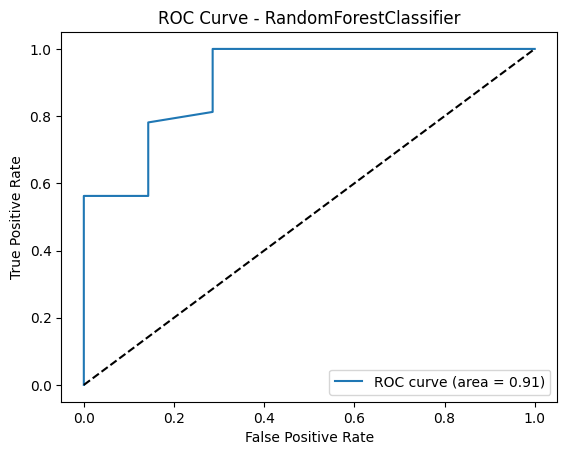

Model: GradientBoostingClassifier
Train Accuracy: 1.0
Test Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39

Confusion Matrix:
 [[ 5  2]
 [ 1 31]]


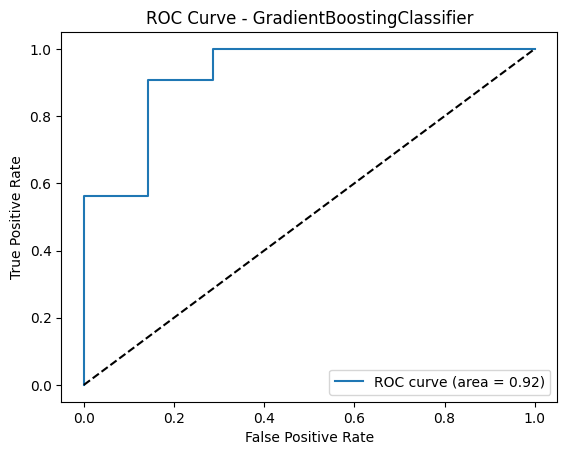

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.938 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.903 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.968 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.871 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.774 total time=   0.0s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.906 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;,

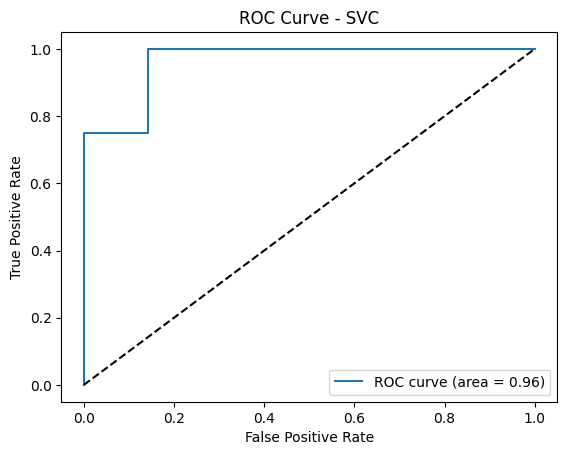

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = 'parkinsons.data'
df = pd.read_csv(data_path)

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data Preprocessing
X = df.drop(['status', 'name'], axis=1)
y = df['status']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Helper function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Train Accuracy: {accuracy_score(y_train, y_train_pred)}')
    print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred)}')
    print('Classification Report:\n', classification_report(y_test, y_test_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    
    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model.__class__.__name__}')
        plt.legend(loc='lower right')
        plt.show()

# Initialize models
models = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC(kernel='linear', probability=True),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

# Evaluate models
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)

# Hyperparameter tuning for the best model (example for SVC)
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

print(f'Best Parameters: {grid.best_params_}')
best_model = grid.best_estimator_
evaluate_model(best_model, X_train, X_test, y_train, y_test)
